# [Kaggle] 영화 데이터 분석

https://www.kaggle.com/rounakbanik/the-movies-dataset

In [4]:
import pandas as pd
import numpy as np

<br>

## ○ 사용자 코사인 유사도 기반 영화 추천

### 1. 데이터 전처리 & 코사인 유사도 계산

In [5]:
movies = pd.read_csv('data/movies.csv') 
ratings = pd.read_csv('data/ratings_small.csv')
metadata = pd.read_csv('data/movies_metadata.csv')

In [6]:
df = pd.merge(ratings, movies, on='movieId')

In [7]:
# 사용자 기준 pivot table
df_matrix_user = df.pivot_table(index='userId', columns='title', values='rating')

# 결측치 0으로 채움
df_matrix_user.fillna(0, inplace=True)
df_matrix_user.head()

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,"Zorro, the Gay Blade (1981)",Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# 사용자간 코사인 유사도 계산
from sklearn.metrics.pairwise import cosine_similarity

user_based = cosine_similarity(df_matrix_user)

# 데이터프레임화
user_based = pd.DataFrame(data=user_based, index=df_matrix_user.index, columns=df_matrix_user.index)
user_based.head()

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.000000,0.000000,0.074482,0.016818,0.000000,0.083884,0.000000,0.012843,0.000000,...,0.000000,0.000000,0.014574,0.043719,0.000000,0.000000,0.000000,0.062917,0.000000,0.017466
2,0.000000,1.000000,0.124295,0.118821,0.103646,0.000000,0.212985,0.113190,0.113333,0.043213,...,0.477306,0.116373,0.078284,0.164162,0.466281,0.425462,0.084646,0.024140,0.170595,0.113175
3,0.000000,0.124295,1.000000,0.081640,0.151531,0.060691,0.154714,0.249781,0.134475,0.114672,...,0.161205,0.118207,0.177356,0.158357,0.177098,0.124562,0.124911,0.080984,0.136606,0.170193
4,0.074482,0.118821,0.081640,1.000000,0.130649,0.079648,0.319745,0.191013,0.030417,0.137186,...,0.114319,0.086959,0.137527,0.254030,0.121905,0.088735,0.068483,0.104309,0.054512,0.211609
5,0.016818,0.103646,0.151531,0.130649,1.000000,0.063796,0.095888,0.165712,0.086616,0.032370,...,0.191029,0.038929,0.147187,0.224245,0.139721,0.058252,0.042926,0.038358,0.062642,0.225086


In [9]:
# 영화 기준 pivot table
df_matrix_movie = df.pivot_table(index='title', columns='userId', values='rating')

# 결측치 0으로 채움
df_matrix_movie.fillna(0, inplace=True)

df_matrix_movie.head()

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
title,,,,,,,,,,,,,,,,,,,,,
"""Great Performances"" Cats (1998)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
$9.99 (2008),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Neath the Arizona Skies (1934),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1]:
# 영화간의 코사인 유사도 계산
movie_based = cosine_similarity(df_matrix_movie)

movie_based = pd.DataFrame(data=movie_based, index=df_matrix_movie.index, columns=df_matrix_movie.index)
movie_based.head()

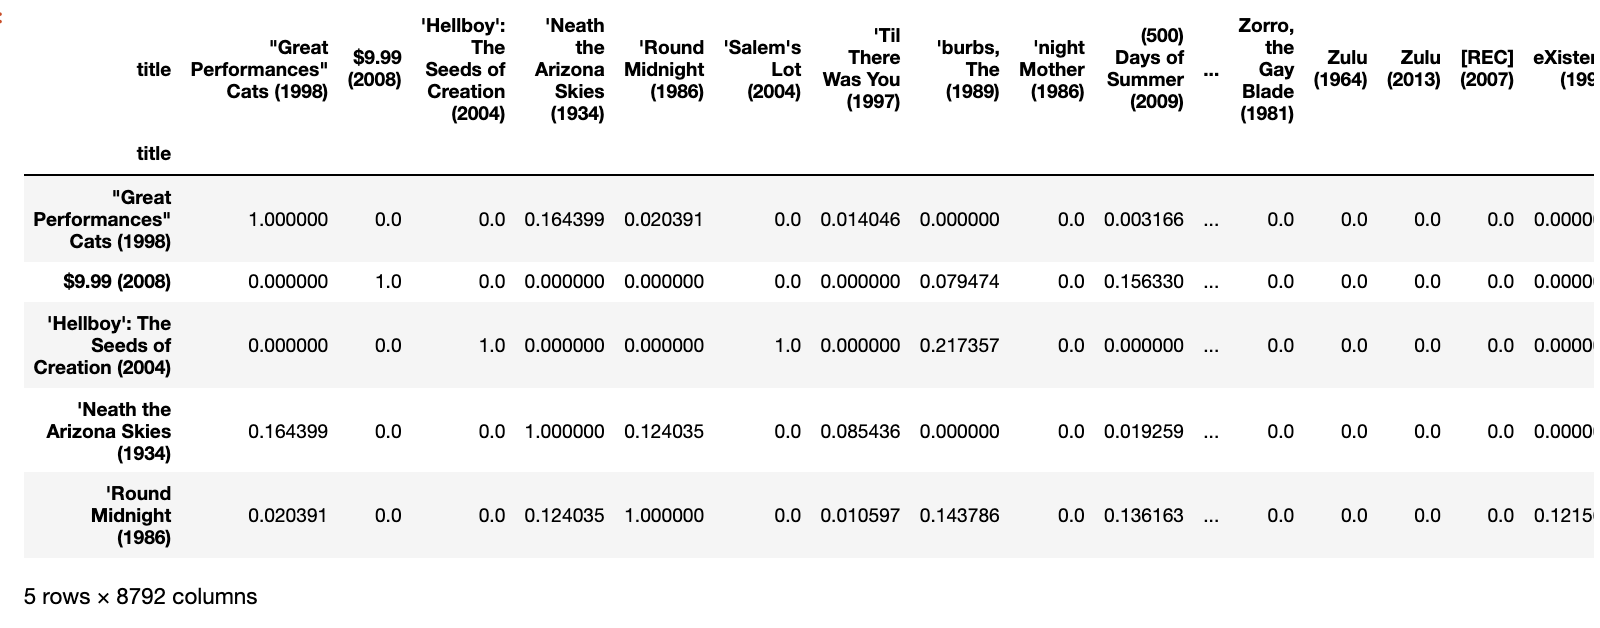

### 2. 영화 추천 서비스 구현

In [11]:
# 비슷한 평점을 매긴(비슷한 취향을 가진) 사용자 상위 n명
def get_similar_users(user, n):
    return user_based[user].sort_values(ascending=False)[:n]

get_similar_users(18, 4) # 자기 자신 포함

userId
18     1.000000
70     0.660646
284    0.643825
256    0.640314
Name: 18, dtype: float64

In [12]:
# 별점 비교와 정렬을 위해 reset index
df_matrix_movie_2 = df_matrix_movie.reset_index()

# 예) 사용자1의 평점 높은 영화 5개
df_matrix_movie_2[['title', 1]].sort_values(1, ascending=False).head() 

userId,title,1
1593,Cinema Paradiso (Nuovo cinema Paradiso) (1989),4.0
8056,Tron (1982),4.0
2926,"French Connection, The (1971)",4.0
2275,Dracula (Bram Stoker's Dracula) (1992),3.5
7090,Sleepers (1996),3.0


In [13]:
# 추천을 원하는 사용자가 이미 본 영화 제거
def del_watched_movie(user, n):
  # user: 추천을 원하는 사용자 / n: 유사도가 높은 사용자
  return df_matrix_movie_2[df_matrix_movie_2[user]==0][['title', user, n]]

In [14]:
def recommend_movie_by_user(user):
    
    # 자기 자신 제외 유사도 높은 사용자 리스트 (3명)
    users = get_similar_users(user, 4).index[1:4] 
    
    rcmd_movies = []
    for i in users:
        # 이미 본 영화 제외 유사도가 높은 사용자가 높게 별점을 준 영화 리스트 받아옴
        movie_list = list(del_watched_movie(user, i).sort_values(i, ascending=False).title[:5])
        rcmd_movies.append(movie_list)

    return rcmd_movies

In [15]:
recommend_movie_by_user(3)

[['Green Mile, The (1999)',
  'Pianist, The (2002)',
  'Donnie Darko (2001)',
  'Big Lebowski, The (1998)',
  'Lives of Others, The (Das leben der Anderen) (2006)'],
 ['Lion King, The (1994)',
  'Toy Story (1995)',
  'Star Wars: Episode IV - A New Hope (1977)',
  'Shrek (2001)',
  'Incredibles, The (2004)'],
 ['Crimson Tide (1995)',
  'Rob Roy (1995)',
  'Jurassic Park (1993)',
  'Clear and Present Danger (1994)',
  'Outbreak (1995)']]

In [16]:
user_num = int(input('추천을 원하는 사용자 번호를 입력하세요: '))
recommend_movie_by_user(user_num)

추천을 원하는 사용자 번호를 입력하세요: 10


[['Lord of the Rings: The Return of the King, The (2003)',
  'Gladiator (2000)',
  'Silence of the Lambs, The (1991)',
  'Spider-Man 2 (2004)',
  'Star Wars: Episode IV - A New Hope (1977)'],
 ['Star Wars: Episode IV - A New Hope (1977)',
  'Wallace & Gromit: The Wrong Trousers (1993)',
  "One Flew Over the Cuckoo's Nest (1975)",
  'Men in Black (a.k.a. MIB) (1997)',
  'Blade Runner (1982)'],
 ['Stripes (1981)',
  'Breakfast Club, The (1985)',
  'On Golden Pond (1981)',
  'Rain Man (1988)',
  'Back to the Future (1985)']]

<br>

### ++) 영화간의 코사인 유사도를 이용한 영화 추천

In [17]:
def recommend_movie_by_rating(title):
    return movie_based[title].sort_values(ascending=False)[:5]

In [18]:
recommend_movie_by_rating('Godfather, The (1972)')

title
Godfather, The (1972)                     1.000000
Godfather: Part II, The (1974)            0.773685
Goodfellas (1990)                         0.620349
One Flew Over the Cuckoo's Nest (1975)    0.568244
American Beauty (1999)                    0.557997
Name: Godfather, The (1972), dtype: float64

<br>

## ○ 새로운 영화에 대한 별점 예측 모델

### 1. 데이터 전처리
#### 1-1. movies_metadata 

In [19]:
metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [20]:
metadata_origin = metadata.copy()

# 청불 여부, 장르, 제목, 예산, 언어, 줄거리, 유명도, 제작사, 제작 국가, 상영시간, 평균 별점, 별점 수 등
meta_columns = ['id', 'title', 'adult', 'budget', 'original_language', 'popularity', 'production_companies', 'production_countries', 'runtime','vote_average', 'vote_count']

metadata = metadata[meta_columns]
metadata.head()

,id,title,adult,budget,original_language,popularity,production_companies,production_countries,runtime,vote_average,vote_count
0,862,Toy Story,False,30000000,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",81.0,7.7,5415.0
1,8844,Jumanji,False,65000000,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",104.0,6.9,2413.0
2,15602,Grumpier Old Men,False,0,en,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",101.0,6.5,92.0
3,31357,Waiting to Exhale,False,16000000,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",127.0,6.1,34.0
4,11862,Father of the Bride Part II,False,0,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",106.0,5.7,173.0


In [21]:
# production_companies

def get_production_com(s):
    try:
        result = eval(s)[0]['name']
    except:
        return -1 # [] 예외처리
    return result

metadata['production_companies'] = metadata['production_companies'].apply(get_production_com)

In [22]:
# production_countries

def get_production_country(s):
    try:
        result = eval(s)[0]['iso_3166_1']
    except:
        return -1 # [] 예외처리
    return result

metadata['production_countries'] = metadata['production_countries'].apply(get_production_country)

In [23]:
# production_companies, production_countries 예외처리된 행 확인
metadata[(metadata.production_companies == -1) | (metadata.production_countries == -1)].head()

,id,title,adult,budget,original_language,popularity,production_companies,production_countries,runtime,vote_average,vote_count
50,117164,Guardian Angel,False,0,en,0.595949,-1,-1,93.0,6.3,3.0
52,49133,Lamerica,False,0,it,1.361286,-1,IT,116.0,7.7,11.0
55,124057,Kids of the Round Table,False,0,en,0.307075,Telefilm Canada,-1,89.0,3.0,1.0
57,11010,The Postman,False,0,it,10.168437,-1,BE,108.0,7.6,181.0
58,99040,The Confessional,False,0,fr,0.120789,-1,CA,100.0,6.5,2.0


In [24]:
metadata = metadata[(metadata.production_countries != -1) & (metadata.production_countries != -1)]
metadata.head()

,id,title,adult,budget,original_language,popularity,production_companies,production_countries,runtime,vote_average,vote_count
0,862,Toy Story,False,30000000,en,21.946943,Pixar Animation Studios,US,81.0,7.7,5415.0
1,8844,Jumanji,False,65000000,en,17.015539,TriStar Pictures,US,104.0,6.9,2413.0
2,15602,Grumpier Old Men,False,0,en,11.7129,Warner Bros.,US,101.0,6.5,92.0
3,31357,Waiting to Exhale,False,16000000,en,3.859495,Twentieth Century Fox Film Corporation,US,127.0,6.1,34.0
4,11862,Father of the Bride Part II,False,0,en,8.387519,Sandollar Productions,US,106.0,5.7,173.0


<br>

#### 1-2. links & movies_metadata

In [25]:
links = pd.read_csv('data/links.csv')
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [26]:
metadata.head()

,id,title,adult,budget,original_language,popularity,production_companies,production_countries,runtime,vote_average,vote_count
0,862,Toy Story,False,30000000,en,21.946943,Pixar Animation Studios,US,81.0,7.7,5415.0
1,8844,Jumanji,False,65000000,en,17.015539,TriStar Pictures,US,104.0,6.9,2413.0
2,15602,Grumpier Old Men,False,0,en,11.7129,Warner Bros.,US,101.0,6.5,92.0
3,31357,Waiting to Exhale,False,16000000,en,3.859495,Twentieth Century Fox Film Corporation,US,127.0,6.1,34.0
4,11862,Father of the Bride Part II,False,0,en,8.387519,Sandollar Productions,US,106.0,5.7,173.0


In [27]:
metadata.id = metadata.id.apply(lambda x: int(x)) # id -> int

# metadata 기준 merge
links_metadata = pd.merge(metadata[meta_columns], links, left_on = 'id', right_on='tmdbId', how='left')
del links_metadata['tmdbId'] # id = tmdbId

# reset index
links_metadata.reset_index(drop=True)
links_metadata.head()

,id,title,adult,budget,original_language,popularity,production_companies,production_countries,runtime,vote_average,vote_count,movieId,imdbId
0,862,Toy Story,False,30000000,en,21.946943,Pixar Animation Studios,US,81.0,7.7,5415.0,1,114709
1,8844,Jumanji,False,65000000,en,17.015539,TriStar Pictures,US,104.0,6.9,2413.0,2,113497
2,15602,Grumpier Old Men,False,0,en,11.7129,Warner Bros.,US,101.0,6.5,92.0,3,113228
3,31357,Waiting to Exhale,False,16000000,en,3.859495,Twentieth Century Fox Film Corporation,US,127.0,6.1,34.0,4,114885
4,11862,Father of the Bride Part II,False,0,en,8.387519,Sandollar Productions,US,106.0,5.7,173.0,5,113041


<br>

#### 1-3. ratings

In [28]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [29]:
# 사용자 리스트
user_list = list(set(ratings['userId']))

# 사용자별 별점 수 리스트
counts = []
for id in user_list:
    counts.append(len(ratings[ratings.userId == id]))
    
rating_counts = pd.DataFrame({'userId':user_list, 'counts':counts})
rating_counts[rating_counts.counts == max(counts)]

,userId,counts
546,547,2391


In [30]:
# 별점을 가장 많이 준 사용자 547의 별점 데이터만 선택
rating_usr = ratings[ratings.userId == 547][['movieId', 'rating']]
rating_usr.head()

,movieId,rating
78433,1,3.5
78434,6,2.5
78435,7,2.0
78436,11,3.0
78437,14,3.5


<br>

#### 1-4. ratings & links_metadata

In [31]:
rating_usr.head()

,movieId,rating
78433,1,3.5
78434,6,2.5
78435,7,2.0
78436,11,3.0
78437,14,3.5


In [32]:
links_metadata.head()

,id,title,adult,budget,original_language,popularity,production_companies,production_countries,runtime,vote_average,vote_count,movieId,imdbId
0,862,Toy Story,False,30000000,en,21.946943,Pixar Animation Studios,US,81.0,7.7,5415.0,1,114709
1,8844,Jumanji,False,65000000,en,17.015539,TriStar Pictures,US,104.0,6.9,2413.0,2,113497
2,15602,Grumpier Old Men,False,0,en,11.7129,Warner Bros.,US,101.0,6.5,92.0,3,113228
3,31357,Waiting to Exhale,False,16000000,en,3.859495,Twentieth Century Fox Film Corporation,US,127.0,6.1,34.0,4,114885
4,11862,Father of the Bride Part II,False,0,en,8.387519,Sandollar Productions,US,106.0,5.7,173.0,5,113041


In [33]:
df = pd.merge(rating_usr, links_metadata, on='movieId')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 0 to 2324
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movieId               2325 non-null   int64  
 1   rating                2325 non-null   float64
 2   id                    2325 non-null   int64  
 3   title                 2325 non-null   object 
 4   adult                 2325 non-null   object 
 5   budget                2325 non-null   object 
 6   original_language     2325 non-null   object 
 7   popularity            2325 non-null   object 
 8   production_companies  2325 non-null   object 
 9   production_countries  2325 non-null   object 
 10  runtime               2325 non-null   float64
 11  vote_average          2325 non-null   float64
 12  vote_count            2325 non-null   float64
 13  imdbId                2325 non-null   int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 272.5+ KB


<br>

### 2. 모델링 데이터 전처리

#### 2-1. X 데이터

In [34]:
df.head()

,movieId,rating,id,title,adult,budget,original_language,popularity,production_companies,production_countries,runtime,vote_average,vote_count,imdbId
0,1,3.5,862,Toy Story,False,30000000,en,21.946943,Pixar Animation Studios,US,81.0,7.7,5415.0,114709
1,6,2.5,949,Heat,False,60000000,en,17.924927,Regency Enterprises,US,170.0,7.7,1886.0,113277
2,7,2.0,11860,Sabrina,False,58000000,en,6.677277,Paramount Pictures,DE,127.0,6.2,141.0,114319
3,11,3.0,9087,The American President,False,62000000,en,6.318445,Columbia Pictures,US,106.0,6.5,199.0,112346
4,14,3.5,10858,Nixon,False,44000000,en,5.092,Hollywood Pictures,US,192.0,7.1,72.0,113987


In [35]:
X_data = df.copy()

x_columns = ['rating', 'adult', 'budget', 'original_language', 'popularity', 'runtime', 'vote_average', 'vote_count']
X_data = X_data[x_columns]

del X_data['adult'] # 모든 행의 adult == False

# original language -> one hot vector
lang_df = pd.get_dummies(X_data['original_language'], prefix='lang')
X_data = X_data.join(lang_df)
del X_data['original_language']

X_data.head()

,rating,budget,popularity,runtime,vote_average,vote_count,lang_af,lang_cn,lang_da,lang_de,...,lang_he,lang_hi,lang_it,lang_ja,lang_nl,lang_pl,lang_pt,lang_sv,lang_th,lang_zh
0,3.5,30000000,21.946943,81.0,7.7,5415.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.5,60000000,17.924927,170.0,7.7,1886.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,58000000,6.677277,127.0,6.2,141.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,62000000,6.318445,106.0,6.5,199.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.5,44000000,5.092,192.0,7.1,72.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<br>

#### 2-2. X, y 데이터

In [36]:
y_data = X_data[['rating']]
y_data.head()

,rating
0,3.5
1,2.5
2,2.0
3,3.0
4,3.5


In [37]:
del X_data['rating']
X_data.head()

,budget,popularity,runtime,vote_average,vote_count,lang_af,lang_cn,lang_da,lang_de,lang_en,...,lang_he,lang_hi,lang_it,lang_ja,lang_nl,lang_pl,lang_pt,lang_sv,lang_th,lang_zh
0,30000000,21.946943,81.0,7.7,5415.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,60000000,17.924927,170.0,7.7,1886.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,58000000,6.677277,127.0,6.2,141.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,62000000,6.318445,106.0,6.5,199.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,44000000,5.092,192.0,7.1,72.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


<br>

#### 2-3. train / test data split

In [38]:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 0 to 2324
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        2325 non-null   object 
 1   popularity    2325 non-null   object 
 2   runtime       2325 non-null   float64
 3   vote_average  2325 non-null   float64
 4   vote_count    2325 non-null   float64
 5   lang_af       2325 non-null   uint8  
 6   lang_cn       2325 non-null   uint8  
 7   lang_da       2325 non-null   uint8  
 8   lang_de       2325 non-null   uint8  
 9   lang_en       2325 non-null   uint8  
 10  lang_es       2325 non-null   uint8  
 11  lang_fr       2325 non-null   uint8  
 12  lang_he       2325 non-null   uint8  
 13  lang_hi       2325 non-null   uint8  
 14  lang_it       2325 non-null   uint8  
 15  lang_ja       2325 non-null   uint8  
 16  lang_nl       2325 non-null   uint8  
 17  lang_pl       2325 non-null   uint8  
 18  lang_pt       2325 non-null 

In [39]:
# object -> float
X_data.budget = X_data.budget.apply(lambda x: float(x))
X_data.popularity = X_data.popularity.apply(lambda x: float(x))

y_data2 = y_data.copy()
y_data2.rating = y_data2.rating.apply(lambda x: int(x*10))

In [40]:
# train / test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_data, y_data2, test_size=0.3, random_state=0)

<br>

### 3. XGBoost

In [41]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [42]:
# create model
model = XGBClassifier(seed = 0, n_jobs = -1, learning_rate = 0.1, n_estimators = 100, max_depth = 3) 

In [43]:
# fit
model.fit(x_train, y_train)

[13:58:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/mldl/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/mldl/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, seed=0, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.26504297994269344

<br>

### 4.  RandomForest

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
# create model
clf = RandomForestClassifier(n_estimators=13)

In [47]:
# train / test
x_train, x_test, y_train, y_test = train_test_split(X_data, y_data2, test_size=0.3, random_state=10)

In [48]:
clf.fit(x_train, y_train)

/var/folders/rf/x6rb6dcs72zflb7qmdmgz13w0000gn/T/ipykernel_6719/3292451027.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


RandomForestClassifier(n_estimators=13)

In [49]:
y_pred = clf.predict(x_test)
clf.score(x_test, y_test)

0.20057306590257878

<br>

### ++ 예측 모델 성능 향상
#### 1. Hyperparameter Optimization

In [52]:
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier()

param_grid = {'max_depth': [3, 5, 7],
              'learning_rate': [0.01, 0.1, 0.2, 0,3],
              'subsample': [0.6, 0.8, 1.0]}

# param_grid = {
#         'silent': [False],
#         'max_depth': [3, 5, 7], 
#         'learning_rate': [0.01, 0.1, 0.2, 0,3],
#         'min_child_weight': [1.0, 3.0, 5.0, 7.0, 10.0],
#         'n_estimators': [100]}

grid = GridSearchCV(xgb, param_grid, refit=True, verbose=1)

grid.fit(x_train, y_train)
print('The best parameters are ', grid.best_params_)

The best parameters are  {'learning_rate': 0.01, 'max_depth': 3, 'subsample': 0.6}

In [51]:
params = {'learning_rate': 0.01, 'max_depth': 3, 'subsample': 0.6}

xgb = XGBClassifier(**params)
xgb.fit(x_train, y_train)
accuracy_score(y_test, xgb.predict(x_test))

[14:01:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.2621776504297994

<br>

#### 2. y 카테고리 축소

In [53]:
y_data.value_counts()

rating
4.0       575
3.0       397
3.5       371
4.5       221
5.0       206
2.0       199
2.5       166
1.0        79
1.5        58
0.5        53
dtype: int64

In [55]:
def rating_categorized(r):
    if r >= 3.0:
        return 0
    else:
        return 1
    
y_data3 = y_data.copy()
y_data3.rating = y_data3.rating.apply(rating_categorized)

y_data3.head()

,rating
0,0
1,1
2,1
3,0
4,0


In [56]:
# train / test
x_train, x_test, y_train, y_test = train_test_split(X_data, y_data3, test_size=0.3, random_state=0)

# create model
model = XGBClassifier(seed = 0, n_jobs = -1, learning_rate = 0.1, n_estimators = 100, max_depth = 3) 

# fit
model.fit(x_train, y_train)

# predict & accuracy
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

[14:10:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/mldl/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/mldl/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7435530085959885

<br>

#### 3. genre 데이터 추가

- genre

In [115]:
rating_usr.head()

,movieId,rating
78433,1,3.5
78434,6,2.5
78435,7,2.0
78436,11,3.0
78437,14,3.5


In [116]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [273]:
df2 = pd.merge(rating_usr, movies[['movieId','genres']], on='movieId')
df2.head()

,movieId,rating,genres
0,1,3.5,Adventure|Animation|Children|Comedy|Fantasy
1,6,2.5,Action|Crime|Thriller
2,7,2.0,Comedy|Romance
3,11,3.0,Comedy|Drama|Romance
4,14,3.5,Drama


In [278]:
# | 기준으로 장르 구분
def genres_split(g):
    return g.split('|')

# 각 영화에 대한 장르 dict 형태로 저장 key(movieId) : value(genres)
genres_list = {}
for i in df2.index:
    genres_list[df2.loc[i]['movieId']] = df2.loc[i]['genres']
    
# dict에 저장된 value(장르) |으로 나눠줌 
for key, value in genres_list.items():
    genres_list[key] = genres_split(value)
    
# 모든 장르 카테고리 확인
genres_all = []
for value in genres_list.values():
    length = len(value)
    for i in range(0, length):
        genres_all.append(value[i])

genres_all = set(genres_all)

genres_all

{'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [123]:
# 데이터프레임으로 바꿔 인덱스 번호 매김
genres_df = pd.DataFrame({'name': list(genres_all)})
genres_df

,name
0,Drama
1,War
2,Musical
3,Romance
4,Action
5,Animation
6,Thriller
7,Crime
8,Comedy
9,Sci-Fi


In [124]:
df2['genres_list'] = df2.genres.apply(genres_split)
del df2['genres']
df2.head()

,movieId,rating,gernes_list
0,1,3.5,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,6,2.5,"[Action, Crime, Thriller]"
2,7,2.0,"[Comedy, Romance]"
3,11,3.0,"[Comedy, Drama, Romance]"
4,14,3.5,[Drama]


In [141]:
# one-hot vector로 사용될 genre 열들 추가
for g in genres_df.name:
    df2[g] = 0 # default

# 해당되는 장르 1로 변경
for index, genres in enumerate(df2.genres_list):
    for genre in genres:
        df2[genre][index] = 1

# 불필요한 열 삭제        
del df2['genres_list']

df2.head()

,movieId,rating,Drama,War,Musical,Romance,Action,Animation,Thriller,Crime,...,Sci-Fi,Western,Documentary,Horror,Children,Fantasy,Film-Noir,IMAX,Adventure,Mystery
0,1,3.5,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,1,0
1,6,2.5,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,7,2.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,3.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14,3.5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [144]:
links_metadata.head()

,id,title,adult,budget,original_language,popularity,production_companies,production_countries,runtime,vote_average,vote_count,movieId,imdbId
0,862,Toy Story,False,30000000,en,21.946943,Pixar Animation Studios,US,81.0,7.7,5415.0,1,114709
1,8844,Jumanji,False,65000000,en,17.015539,TriStar Pictures,US,104.0,6.9,2413.0,2,113497
2,15602,Grumpier Old Men,False,0,en,11.7129,Warner Bros.,US,101.0,6.5,92.0,3,113228
3,31357,Waiting to Exhale,False,16000000,en,3.859495,Twentieth Century Fox Film Corporation,US,127.0,6.1,34.0,4,114885
4,11862,Father of the Bride Part II,False,0,en,8.387519,Sandollar Productions,US,106.0,5.7,173.0,5,113041


In [148]:
# metadata 추가
df2 = pd.merge(df2, links_metadata[['title', 'budget', 'original_language', 'popularity', 'runtime', 'vote_average', 'vote_count', 'movieId']], on='movieId')

In [149]:
df2.head()

,movieId,rating,Drama,War,Musical,Romance,Action,Animation,Thriller,Crime,...,IMAX,Adventure,Mystery,title,budget,original_language,popularity,runtime,vote_average,vote_count
0,1,3.5,0,0,0,0,0,1,0,0,...,0,1,0,Toy Story,30000000,en,21.946943,81.0,7.7,5415.0
1,6,2.5,0,0,0,0,1,0,1,1,...,0,0,0,Heat,60000000,en,17.924927,170.0,7.7,1886.0
2,7,2.0,0,0,0,1,0,0,0,0,...,0,0,0,Sabrina,58000000,en,6.677277,127.0,6.2,141.0
3,11,3.0,1,0,0,1,0,0,0,0,...,0,0,0,The American President,62000000,en,6.318445,106.0,6.5,199.0
4,14,3.5,1,0,0,0,0,0,0,0,...,0,0,0,Nixon,44000000,en,5.092,192.0,7.1,72.0


- original_language

In [172]:
langs = df2.original_language.unique()
langs_df = pd.DataFrame({'lan': langs})

langs_df

,lan
0,en
1,cn
2,zh
3,es
4,fr
5,ja
6,de
7,it
8,sv
9,pt


In [176]:
langs_df.reset_index(inplace=True)
langs_df.set_index(langs_df.lan, inplace=True)
del langs_df['lan']
langs_df.head()

,index
lan,
en,0
cn,1
zh,2
es,3
fr,4


In [179]:
def lang_categorized(lan):
    return langs_df.loc[lan]['index']

In [182]:
df2.original_language = df2.original_language.apply(lang_categorized)
df2.head()

,movieId,rating,Drama,War,Musical,Romance,Action,Animation,Thriller,Crime,...,IMAX,Adventure,Mystery,title,budget,original_language,popularity,runtime,vote_average,vote_count
0,1,3.5,0,0,0,0,0,1,0,0,...,0,1,0,Toy Story,30000000,0,21.946943,81.0,7.7,5415.0
1,6,2.5,0,0,0,0,1,0,1,1,...,0,0,0,Heat,60000000,0,17.924927,170.0,7.7,1886.0
2,7,2.0,0,0,0,1,0,0,0,0,...,0,0,0,Sabrina,58000000,0,6.677277,127.0,6.2,141.0
3,11,3.0,1,0,0,1,0,0,0,0,...,0,0,0,The American President,62000000,0,6.318445,106.0,6.5,199.0
4,14,3.5,1,0,0,0,0,0,0,0,...,0,0,0,Nixon,44000000,0,5.092,192.0,7.1,72.0


In [184]:
df2.columns

Index(['movieId', 'rating', 'Drama', 'War', 'Musical', 'Romance', 'Action',
       'Animation', 'Thriller', 'Crime', 'Comedy', 'Sci-Fi', 'Western',
       'Documentary', 'Horror', 'Children', 'Fantasy', 'Film-Noir', 'IMAX',
       'Adventure', 'Mystery', 'title', 'budget', 'original_language',
       'popularity', 'runtime', 'vote_average', 'vote_count'],
      dtype='object')

In [207]:
df2.popularity = df2.popularity.apply(lambda x: float(x))
df2.budget = df2.budget.apply(lambda x: int(x))

df2.rating = df2.rating.apply(rating_categorized)

y_data3 = df2['rating']

columns = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'budget', 'popularity', 'runtime', 'vote_average', 'vote_count','original_language']
X_data2 = df2[columns]
X_data2.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,...,Sci-Fi,Thriller,War,Western,budget,popularity,runtime,vote_average,vote_count,original_language
0,0,1,1,1,1,0,0,0,1,0,...,0,0,0,0,30000000,21.946943,81.0,7.7,5415.0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,60000000,17.924927,170.0,7.7,1886.0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,58000000,6.677277,127.0,6.2,141.0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,62000000,6.318445,106.0,6.5,199.0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,44000000,5.092000,192.0,7.1,72.0,0


In [210]:
x_train, x_test, y_train, y_test = train_test_split(X_data2, y_data3, test_size=0.3, random_state=10)

params = {'learning_rate': 0.01, 'max_depth': 3, 'subsample': 0.6}

xgb = XGBClassifier(**params)
xgb.fit(x_train, y_train)
accuracy_score(y_test, xgb.predict(x_test))

[16:20:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/mldl/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7675438596491229

<br>

### 3. 새로운 영화에 대한 별점 예측해보기

In [211]:
X_data2.columns

Index(['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western',
       'budget', 'popularity', 'runtime', 'vote_average', 'vote_count',
       'original_language'],
      dtype='object')

In [221]:
X_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2280 entries, 0 to 2279
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Action             2280 non-null   int64  
 1   Adventure          2280 non-null   int64  
 2   Animation          2280 non-null   int64  
 3   Children           2280 non-null   int64  
 4   Comedy             2280 non-null   int64  
 5   Crime              2280 non-null   int64  
 6   Documentary        2280 non-null   int64  
 7   Drama              2280 non-null   int64  
 8   Fantasy            2280 non-null   int64  
 9   Film-Noir          2280 non-null   int64  
 10  Horror             2280 non-null   int64  
 11  IMAX               2280 non-null   int64  
 12  Musical            2280 non-null   int64  
 13  Mystery            2280 non-null   int64  
 14  Romance            2280 non-null   int64  
 15  Sci-Fi             2280 non-null   int64  
 16  Thriller           2280 

In [229]:
xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [270]:
# 별점 예측
def predict_rating(title, genre, runtime, budget, vote_avg, vote_cnt, lang, popularity):
    
    # 새로운 x-data 행 추가
    X_data2.loc['new'] = ""
    X_data2.loc['new']['runtime'] = float(runtime)
    X_data2.loc['new']['budget'] = int(budget)
    X_data2.loc['new']['popularity'] = float(popularity)
    X_data2.loc['new']['vote_average'] = float(vote_avg)
    X_data2.loc['new']['vote_count'] = float(vote_cnt)
    
    # language
    X_data2.loc['new']['original_language'] = lang_categorized(lang)
    
    # genre
    genre = list(gerne.split(' '))
    for g in list(genres_all):
        if g in gerne:
            X_data2.loc['new'][g] = 1
        else:
            X_data2.loc['new'][g] = 0
            
    x_pred = X_data2.tail(1)
    
    X_data2.drop('new')
    
    y_pred = xgb.predict(x_pred)
    return y_pred

In [271]:
title = input('제목을 입력해 주세요: ')
gerne = input('장르를 선택해 주세요(복수 나열 가능) '+ str(genres_all) + '\n: ')
runtime = input('상영 시간을 입력해 주세요: ')
budget = input('예산을 입력해 주세요: ')
vote_avg = input('평균 별점을 입력해 주세요: ')
vote_cnt = input('별점 수를 입력해 주세요: ')
popularity = input('인지도를 입력해 주세요: ')
lang = input('언어를 선택해 주세요 ' + str(langs) + '\n: ')

제목을 입력해 주세요: titanic
장르를 선택해 주세요(복수 나열 가능) {'Drama', 'War', 'Musical', 'Romance', 'Action', 'Animation', 'Thriller', 'Crime', 'Comedy', 'Sci-Fi', 'Western', 'Documentary', 'Horror', 'Children', 'Fantasy', 'Film-Noir', 'IMAX', 'Adventure', 'Mystery'}
: Drama Romance
상영 시간을 입력해 주세요: 120
예산을 입력해 주세요: 100000000
평균 별점을 입력해 주세요: 9.4
별점 수를 입력해 주세요: 2000
인지도를 입력해 주세요: 25
언어를 선택해 주세요 ['en' 'cn' 'zh' 'es' 'fr' 'ja' 'de' 'it' 'sv' 'pt' 'da' 'nl' 'hi' 'pl'
 'th' 'af' 'he']
: en


In [272]:
rate = predict_rating(title, gerne, runtime, budget, vote_avg, vote_cnt, lang, popularity)

if rate == 0:
    print(f"영화 [{title}]의 별점은 3.0 이상으로 예측됩니다.")
else: 
    print(f"영화 [{title}]의 별점은 3.0 미만으로 예측됩니다.")

영화 [titanic]의 별점은 3.0 이상으로 예측됩니다.
